## Training Decision Tree Model Applying SFS

### Step 1 | Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from plot_confusion_matrix import plot_confusion_matrix

### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Train model with selected hyperparameter from tuning function and applying SFS

In [4]:
dt = DecisionTreeClassifier(criterion = 'entropy',
 max_depth = 11,
 max_features = None,
 min_samples_leaf = 10,
 min_samples_split = 2,
 splitter = 'best',
 random_state=42)

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=False)

pipe = Pipeline([
    ('sfs', SequentialFeatureSelector(dt, n_features_to_select='auto', tol=None, direction='forward', scoring="accuracy", cv=cv, n_jobs=-1)),
    ('dt', dt)
])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sfs',
                 SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                           estimator=DecisionTreeClassifier(criterion='entropy',
                                                                            max_depth=11,
                                                                            min_samples_leaf=10,
                                                                            random_state=42),
                                           n_jobs=-1, scoring='accuracy')),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=11,
                                        min_samples_leaf=10,
                                        random_state=42))])

In [7]:
selected_features = X_train.columns[pipe.named_steps['sfs'].get_support()].tolist()
print("Selected features:", selected_features)


Selected features: ['Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'CH2O', 'CALC', 'MTRANS_Automobile', 'MTRANS_Walking']


In [8]:
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

In [9]:
y_pred = dt.predict(X_train_sfs)
accuracy = accuracy_score(y_train, y_pred)
print(classification_report(y_train, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9138    0.9405    0.9270      2018
           1     0.8605    0.8706    0.8655      2465
           2     0.7863    0.7750    0.7806      1942
           3     0.8050    0.7919    0.7984      2018
           4     0.8834    0.8655    0.8744      2328
           5     0.9600    0.9619    0.9610      2598
           6     0.9929    0.9975    0.9952      3237

    accuracy                         0.8967     16606
   macro avg     0.8860    0.8861    0.8860     16606
weighted avg     0.8962    0.8967    0.8964     16606



C:\Users\minhz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [10]:
y_pred = dt.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8908    0.9366    0.9131       505
           1     0.8236    0.8250    0.8243       617
           2     0.7697    0.7237    0.7460       485
           3     0.7604    0.7619    0.7611       504
           4     0.8362    0.8333    0.8348       582
           5     0.9598    0.9554    0.9576       650
           6     0.9890    0.9963    0.9926       809

    accuracy                         0.8740      4152
   macro avg     0.8614    0.8617    0.8614      4152
weighted avg     0.8731    0.8740    0.8734      4152



C:\Users\minhz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


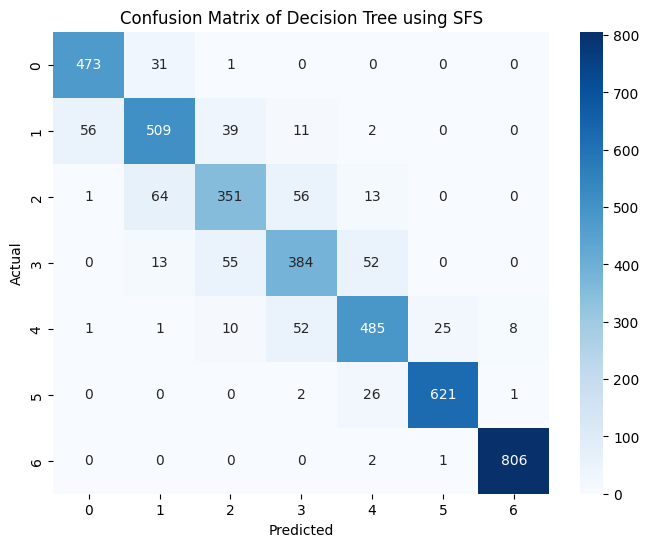

In [11]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix of Decision Tree using SFS')